# SuPy UHI testing January 12 2021

In [3]:
import matplotlib.pyplot as plt
import supy as sp
import pandas as pd
import numpy as np
from pathlib import Path
from night import night 
# from dict_legend import *
# from supy_plot import supy_plot
get_ipython().run_line_magic('matplotlib', 'inline')
# get_ipython().run_line_magic('config', "InlineBackend.figure_format = 'svg'")
sp.show_version()

SuPy versions
-------------
supy: 2021.1.12 
supy_driver: 2020b10

SYSTEM DEPENDENCY

INSTALLED VERSIONS
------------------
commit           : 3e89b4c4b1580aa890023fc550774e63d499da25
python           : 3.8.6.final.0
python-bits      : 64
OS               : Darwin
OS-release       : 20.2.0
Version          : Darwin Kernel Version 20.2.0: Wed Dec  2 20:39:59 PST 2020; root:xnu-7195.60.75~1/RELEASE_X86_64
machine          : x86_64
processor        : i386
byteorder        : little
LC_ALL           : None
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.2.0
numpy            : 1.19.1
pytz             : 2020.5
dateutil         : 2.8.1
pip              : 20.2.1
setuptools       : 49.6.0.post20201009
Cython           : None
pytest           : 6.0.1
hypothesis       : None
sphinx           : 3.3.1
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : 4.6.2
html5lib         : None
pymysql          : None
psycopg2         : N

In [6]:
# Sample Data
path_runcontrol_s = Path('sample_run')/ 'RunControl.nml'
df_state_init_s = sp.init_supy(path_runcontrol_s)
grid_s = df_state_init_s.index[0]
df_forcing_s = sp.load_forcing_grid(path_runcontrol_s, grid_s)

# Wisley Data
path_runcontrol_w = Path('sample_run')/ 'RunControl_wisley.nml'
df_state_init_w = sp.init_supy(path_runcontrol_w)
grid_w = df_state_init_w.index[0]
df_forcing_w = sp.load_forcing_grid(path_runcontrol_w, grid_w)

# Wisley Data
path_runcontrol_wu = Path('sample_run')/ 'RunControl_wisley_urban.nml'
df_state_init_wu = sp.init_supy(path_runcontrol_wu)
grid_wu = df_state_init_wu.index[0]
df_forcing_wu = sp.load_forcing_grid(path_runcontrol_wu, grid_wu)


2021-01-14 10:08:25,892 - SuPy - INFO - All cache cleared.
2021-01-14 10:08:27,646 - SuPy - INFO - All cache cleared.
2021-01-14 10:08:30,200 - SuPy - INFO - All cache cleared.
2021-01-14 10:08:31,871 - SuPy - INFO - All cache cleared.
2021-01-14 10:08:34,527 - SuPy - INFO - All cache cleared.
2021-01-14 10:08:36,326 - SuPy - INFO - All cache cleared.
2021-01-14 10:08:38,685 - SuPy - INFO - SuPy is validating `df_forcing`...
2021-01-14 10:08:44,460 - SuPy - INFO - All checks for `df_forcing` passed!
2021-01-14 10:08:44,461 - SuPy - INFO - SuPy is validating `df_forcing`...
2021-01-14 10:08:50,281 - SuPy - INFO - All checks for `df_forcing` passed!
2021-01-14 10:08:50,282 - SuPy - INFO - SuPy is validating `df_forcing`...
2021-01-14 10:08:56,213 - SuPy - INFO - All checks for `df_forcing` passed!


In [7]:

sp.check_forcing(df_forcing_s)
sp.check_forcing(df_forcing_w)
sp.check_forcing(df_forcing_wu)

2021-01-14 10:09:13,929 - SuPy - INFO - SuPy is validating `df_forcing`...
2021-01-14 10:09:20,036 - SuPy - INFO - All checks for `df_forcing` passed!
2021-01-14 10:09:20,037 - SuPy - INFO - SuPy is validating `df_forcing`...
2021-01-14 10:09:25,814 - SuPy - INFO - All checks for `df_forcing` passed!
2021-01-14 10:09:25,815 - SuPy - INFO - SuPy is validating `df_forcing`...
2021-01-14 10:09:31,650 - SuPy - INFO - All checks for `df_forcing` passed!


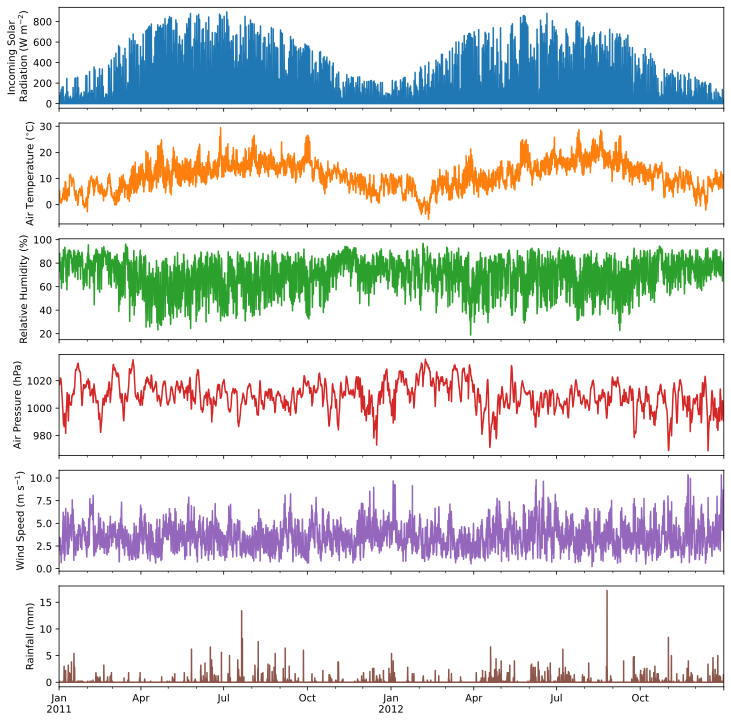

In [3]:
# %% Sample Data Metological Conditions

df_plot_forcing_x = df_forcing_s.loc[:, list_var_forcing].copy().shift(
    -1).dropna(how='any')
df_plot_forcing = df_plot_forcing_x.resample('1h').mean()
df_plot_forcing['rain'] = df_plot_forcing_x['rain'].resample('1h').sum()

axes = df_plot_forcing.plot(
    subplots=True,
    figsize=(10, 12),
    legend=False,
)
fig = axes[0].figure
fig.tight_layout()
fig.autofmt_xdate(bottom=0.2, rotation=0, ha='center')
for ax, var in zip(axes, list_var_forcing):
    ax.set_ylabel(dict_var_label[var])

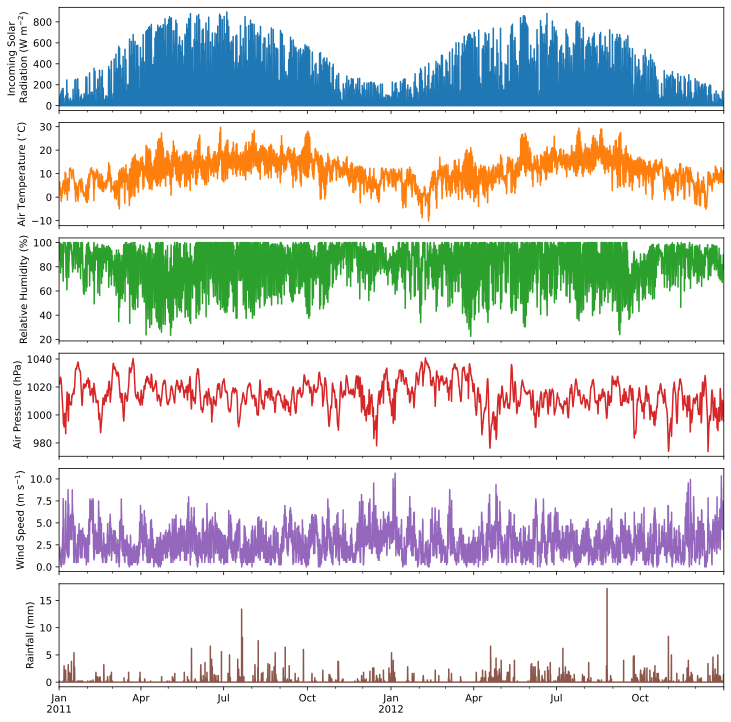

In [4]:
# %% Wisley Metological Conditions

df_plot_forcing_x = df_forcing_w.loc[:, list_var_forcing].copy().shift(
    -1).dropna(how='any')
df_plot_forcing = df_plot_forcing_x.resample('1h').mean()
df_plot_forcing['rain'] = df_plot_forcing_x['rain'].resample('1h').sum()

axes = df_plot_forcing.plot(
    subplots=True,
    figsize=(10, 12),
    legend=False,
)
fig = axes[0].figure
fig.tight_layout()
fig.autofmt_xdate(bottom=0.2, rotation=0, ha='center')
for ax, var in zip(axes, list_var_forcing):
    ax.set_ylabel(dict_var_label[var])

In [5]:
# %% Investigate Metreological conditions for London and Wisley
df_forcing_wi = df_forcing_w.add_suffix('_w')

df_forcing_m = pd.concat([df_forcing_s,df_forcing_wi], axis=1, join='inner')
df_forcing_m = df_forcing_m.rename(columns={'kdown': 'Kdown'})

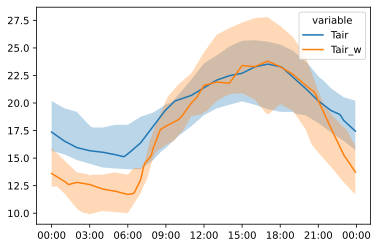

In [6]:
# %% June Tair Sample Data
s = '2012 07 21'
e = '2012 07 29'
ax = sp.util.plot_day_clm(df_forcing_m.loc[s:e,['Tair', 'Tair_w']])

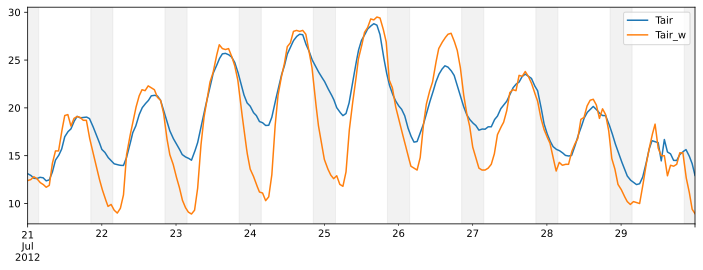

In [7]:
# %% June Tair Wisley Data 
ax_output = df_forcing_m.loc[s:e,['Tair','Tair_w']].plot(figsize=(12,4))
night(ax_output,df_forcing_m,s,e,s_alpha=0.1)

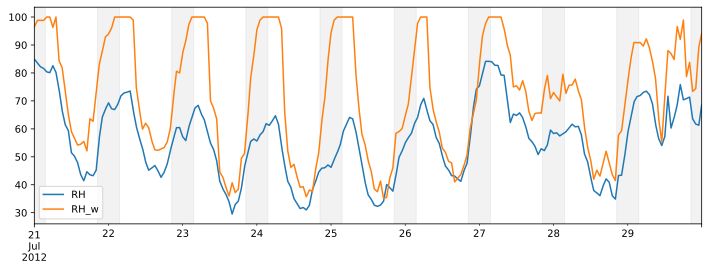

In [8]:
# %%  RH Selected days comparison
ax_output = df_forcing_m.loc[s:e,['RH','RH_w']].plot(figsize=(12,4))
night(ax_output,df_forcing_m,s,e,s_alpha=0.1)

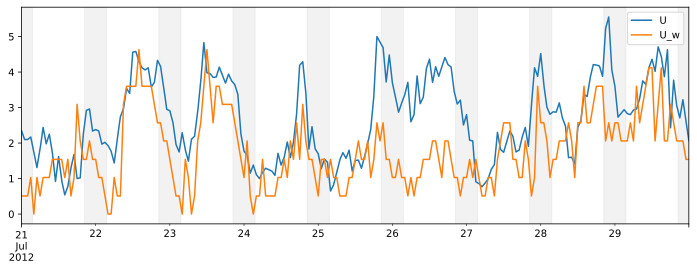

In [9]:
# %%  U Selected days comparison
ax_output = df_forcing_m.loc[s:e,['U','U_w']].plot(figsize=(12,4))
night(ax_output,df_forcing_m,s,e,s_alpha=0.1)

# Scenarios used 

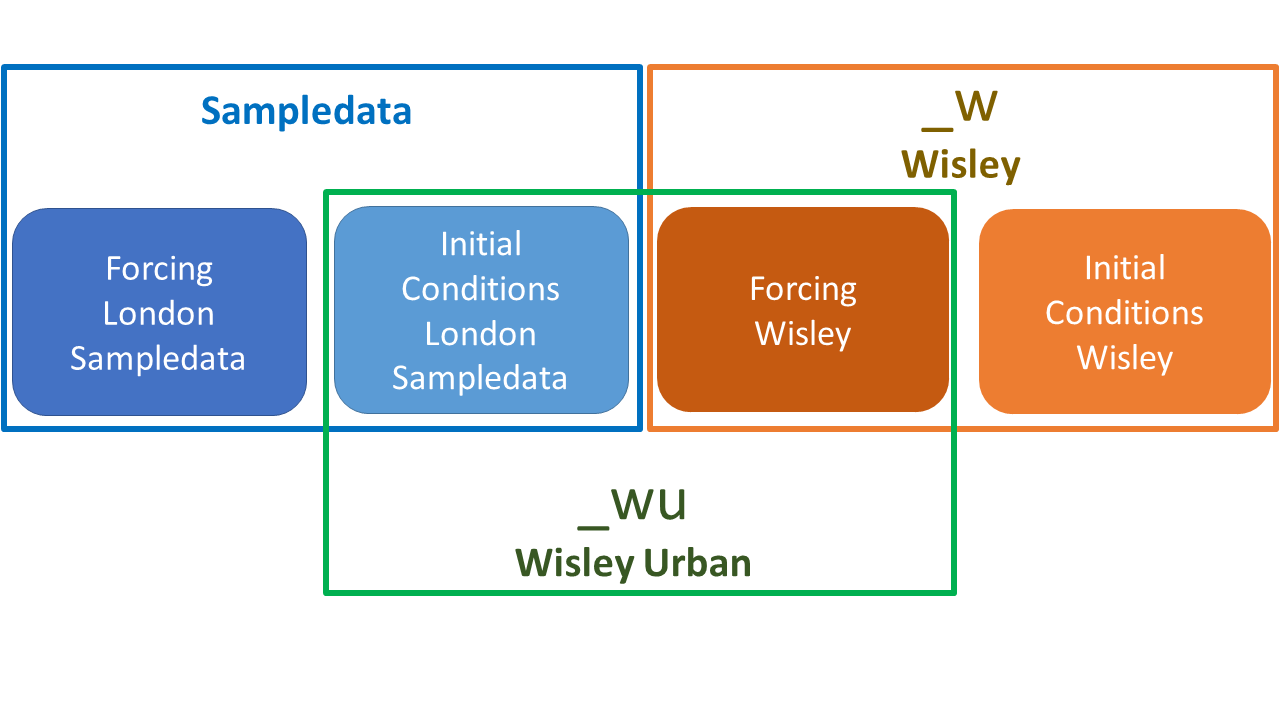

Wisley forcing data obtained from CEDA Archive

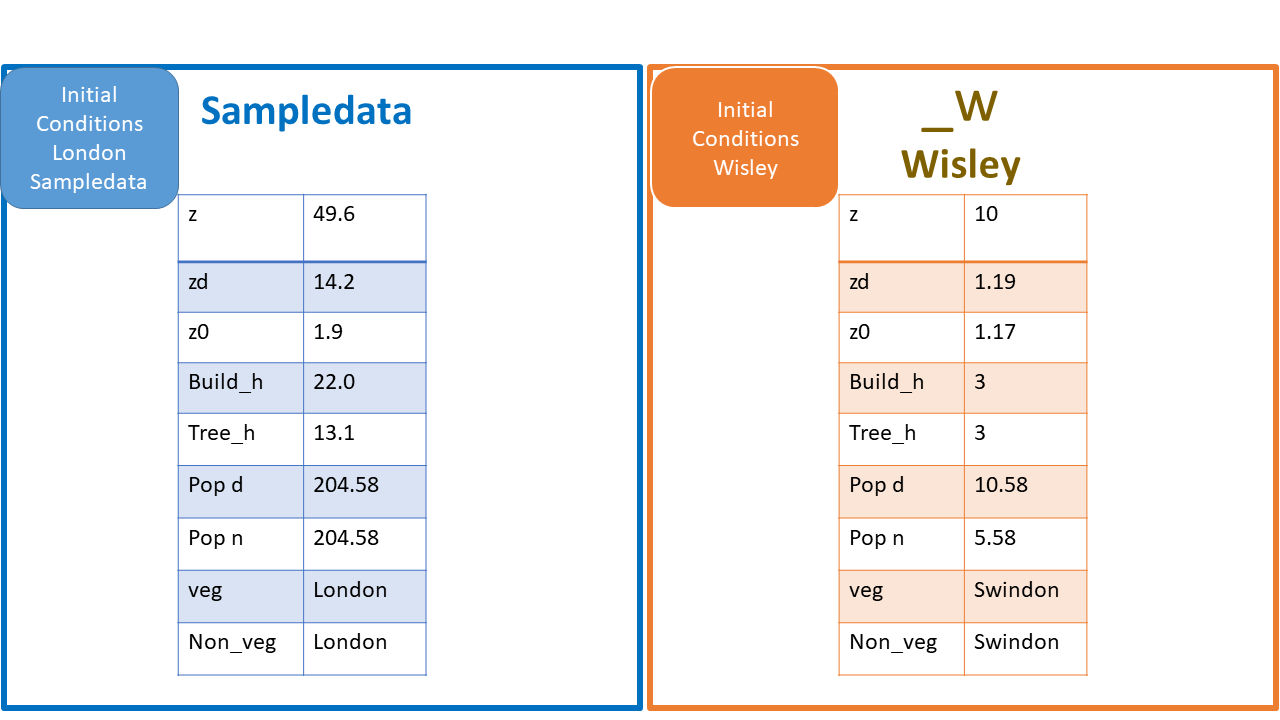

In [8]:
sp.check_state(df_state_init_s)
sp.check_state(df_state_init_w)
sp.check_state(df_state_init_wu)

2021-01-14 10:09:56,651 - SuPy - INFO - SuPy is validating `df_state`...
2021-01-14 10:09:56,908 - SuPy - INFO - All checks for `df_state` passed!
2021-01-14 10:09:56,909 - SuPy - INFO - SuPy is validating `df_state`...
2021-01-14 10:09:57,152 - SuPy - INFO - All checks for `df_state` passed!
2021-01-14 10:09:57,152 - SuPy - INFO - SuPy is validating `df_state`...
2021-01-14 10:09:57,426 - SuPy - INFO - All checks for `df_state` passed!


## Run SuPy

In [9]:

# Run SuPy Sample data conditions
df_output_s, df_state_final_s = sp.run_supy(df_forcing_s, df_state_init_s)
df_output_suews_s = df_output_s['SUEWS']

# Run SuPy with Whisley add _w for recognition later on
df_output_w, df_state_final_w = sp.run_supy(df_forcing_w, df_state_init_w)
df_output_suews_w = df_output_w['SUEWS']
df_output_suews_w = df_output_suews_w.add_suffix('_w')
# 
# Run SuPy with Whisley met data and Sample data initial conditions add _wu for recognition later on
df_output_wu, df_state_final_wu = sp.run_supy(df_forcing_wu, df_state_init_wu)
df_output_suews_wu = df_output_wu['SUEWS']
df_output_suews_wu = df_output_suews_wu.add_suffix('_wu')

2021-01-14 10:10:03,016 - SuPy - INFO - ====================
2021-01-14 10:10:03,017 - SuPy - INFO - Simulation period:
2021-01-14 10:10:03,018 - SuPy - INFO -   Start: 2011-01-01 00:05:00
2021-01-14 10:10:03,019 - SuPy - INFO -   End: 2013-01-01 00:00:00
2021-01-14 10:10:03,020 - SuPy - INFO - 
2021-01-14 10:10:03,021 - SuPy - INFO - No. of grids: 1
2021-01-14 10:10:03,022 - SuPy - INFO - SuPy is running in serial mode
2021-01-14 10:10:38,359 - SuPy - INFO - Execution time: 35.3 s
2021-01-14 10:10:38,361 - SuPy - INFO - ====================

2021-01-14 10:10:38,362 - SuPy - INFO - ====================
2021-01-14 10:10:38,363 - SuPy - INFO - Simulation period:
2021-01-14 10:10:38,364 - SuPy - INFO -   Start: 2011-01-01 00:05:00
2021-01-14 10:10:38,365 - SuPy - INFO -   End: 2013-01-01 00:00:00
2021-01-14 10:10:38,366 - SuPy - INFO - 
2021-01-14 10:10:38,367 - SuPy - INFO - No. of grids: 1
2021-01-14 10:10:38,368 - SuPy - INFO - SuPy is running in serial mode
2021-01-14 10:11:37,633 - S

In [12]:
# Merge to one dataframe for easier plotting
df_output_suews_g_s  = df_output_suews_s.loc[grid_s]
df_output_suews_g_w  = df_output_suews_w.loc[grid_w]
df_output_suews_g_wu = df_output_suews_wu.loc[grid_wu]

df_merge = pd.concat([df_output_suews_g_s, df_output_suews_g_w,df_output_suews_g_wu],axis=1,join='inner')


# Add possibilites for investigating differences
init_col = list(df_output_suews_s)
w_col = list(df_output_suews_w)
wu_col = list(df_output_suews_wu)

for i, wd, w, wud, wu in zip(init_col,[sub + '_d' for sub in w_col],w_col,[sub + '_d' for sub in wu_col],wu_col):
    df_merge[wd] = df_merge[w] - df_merge[i]
    df_merge[wud] = df_merge[wu] - df_merge[i]

## Diffrences in forcing data, London (Blue) Wisley (Orange)

Rain and Kdown same for both forcing datasets!

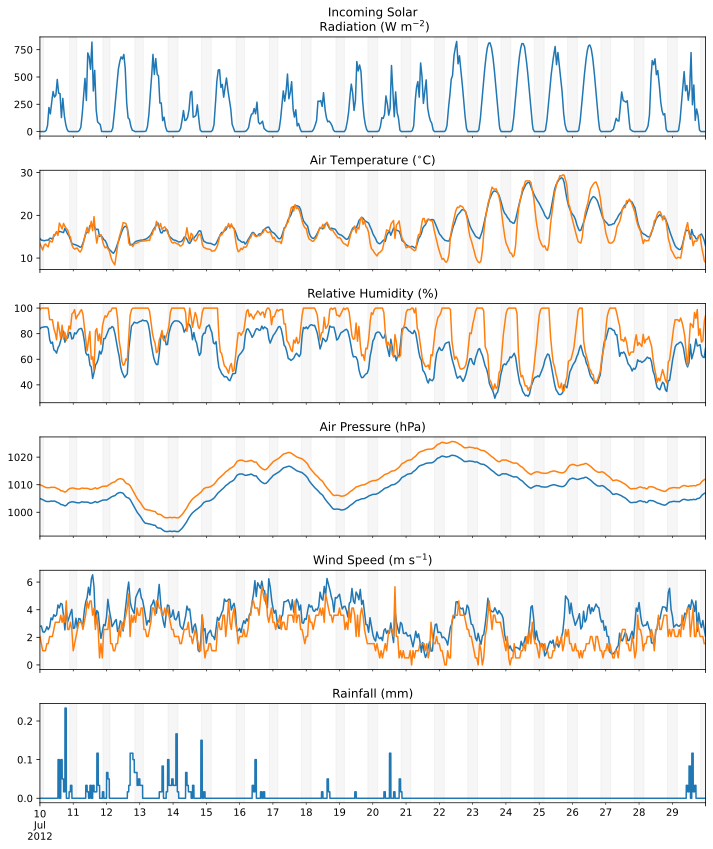

In [13]:
fsize=(10,12)
fig, axes = plt.subplots(6, 1, sharex=True)
s='2012 07 10'
a = df_forcing_m.loc[s : e ,['Kdown']].plot(ax=axes[0],figsize=fsize,title= 'Incoming Solar\n Radiation ($ \mathrm{W \ m^{-2}}$)')
b = df_forcing_m.loc[s : e ,['Tair','Tair_w']].plot(ax=axes[1],figsize=fsize,title='Air Temperature ($^{\circ}}$C)')
c = df_forcing_m.loc[s : e ,['RH','RH_w']].plot(ax=axes[2],figsize=fsize,title='Relative Humidity (%)')
d = df_forcing_m.loc[s : e ,['pres','pres_w']].plot(ax=axes[3],figsize=fsize,title='Air Pressure (hPa)')
e1= df_forcing_m.loc[s : e ,['U','U_w']].plot(ax=axes[4],figsize=fsize,title='Wind Speed (m $\mathrm{s^{-1}}$)')
f = df_forcing_m.loc[s : e ,['rain']].plot(ax=axes[5],figsize=fsize,title='Rainfall (mm)')
for var in [a,b,c,d,e1,f]:
    figsize=fsize
    night(var,df_forcing_m,s,e)
    var.get_legend().remove()
fig.tight_layout()

# Comparison of Fluxes 
 All diffrences are done in comparison to the Sample Data Set
 
 22th - 29th of June 2012 is used as time of comparison

In [49]:
# Start and end date for comparison
s = '2012 07 22'
e = '2012 07 29'

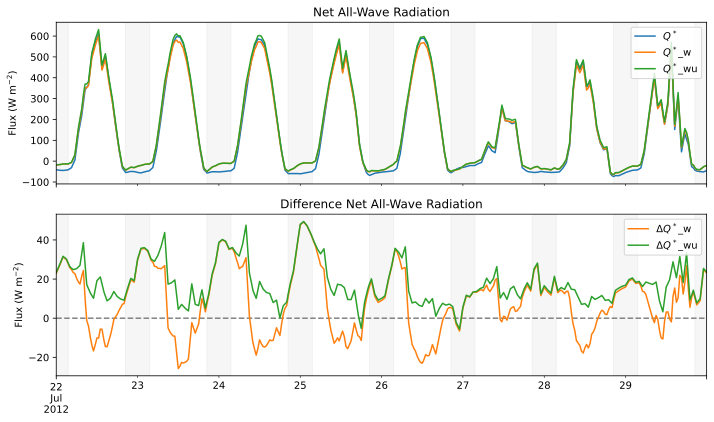

In [15]:
# %% Net All Wave Radiation
var = 'QN'
supy_plot(var, df_merge,s,e,size=(10,6))

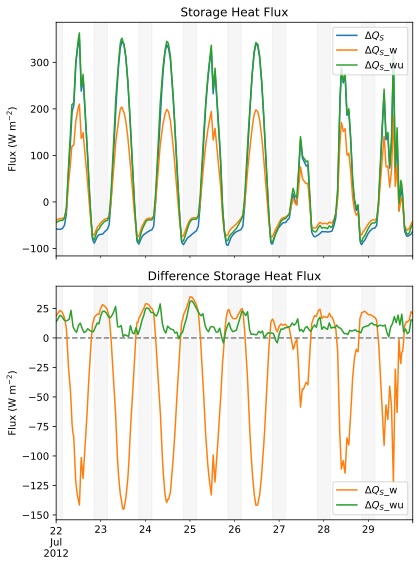

In [16]:
# %% Storage Heat Flux
var = 'QS'
supy_plot(var, df_merge,s,e)

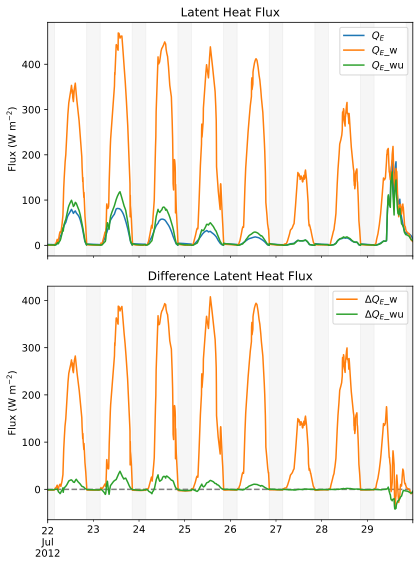

In [17]:
# Latent Heat Flux
var = 'QE'
supy_plot(var, df_merge,s,e)

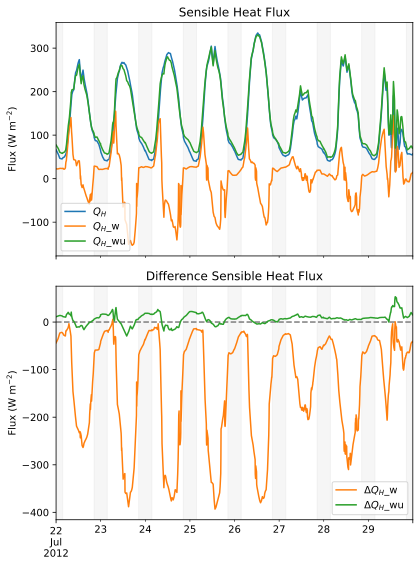

In [18]:
# Sensible Heat Flux
var = 'QH'
supy_plot(var, df_merge,s,e)

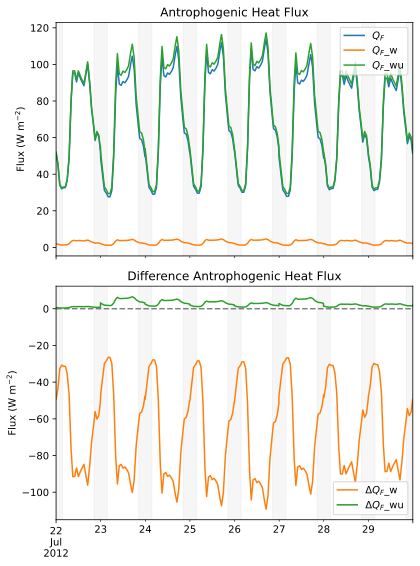

In [19]:
# %%% Anthropogenic Heat flux
supy_plot('QF', df_merge,s,e)

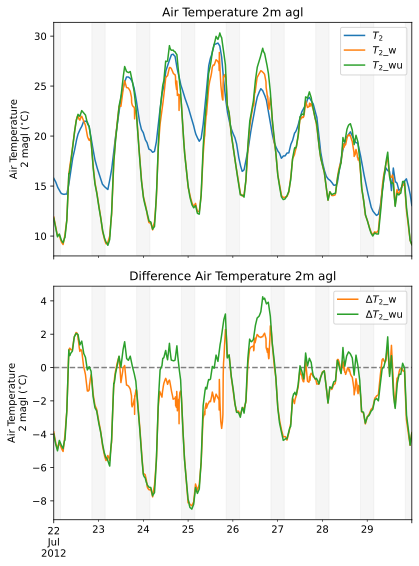

In [20]:
# Air temp 2m
supy_plot('T2', df_merge,s,e)

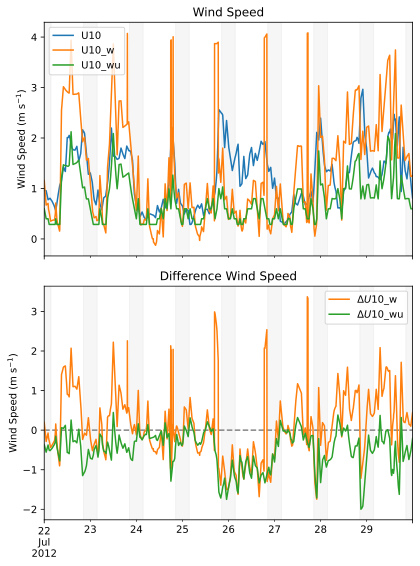

In [21]:
# %% Wind Speed 10m
supy_plot('U10', df_merge,s,e)

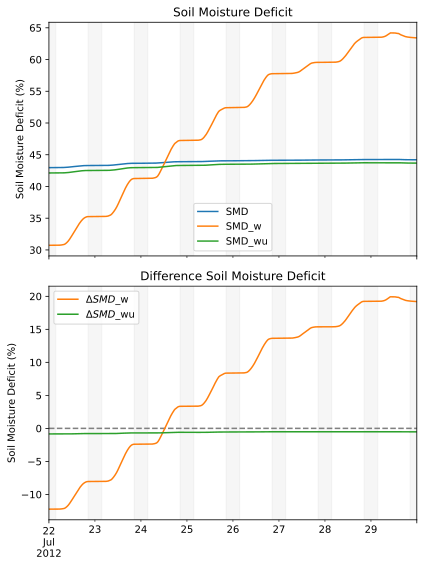

In [22]:
# %% Soil Moisture Deficit
supy_plot('SMD', df_merge,s,e)

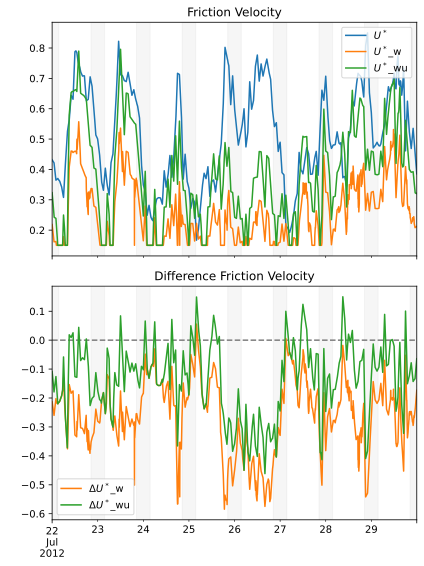

In [23]:
supy_plot('UStar', df_merge,s,e)

## large QE at Wisley: why?

In [70]:
df_output_merge_x=pd.concat([df_output_s, df_output_w,df_output_wu],axis=1,join='inner',keys=['fKC_sKC','fWS_sWS','fWS_sKC']).swaplevel(0,-1,axis=1).swaplevel(0,1,axis=1).sort_index(axis=1)


In [73]:
# df_output_merge_x.head().loc[1]
df_state_merge_x

var     aerodynamicresistancemethod                  ah_min                \
                            fKC_sKC fWS_sKC fWS_sWS fKC_sKC       fWS_sKC   
ind_dim                           0       0       0    (0,)  (1,)    (0,)   
grid                                                                        
1                                 2       2       2    15.0  15.0    15.0   

var                         ah_slope_cooling  ... wuprofm_24hr       z  \
              fWS_sWS                fKC_sKC  ...      fWS_sWS fKC_sKC   
ind_dim  (1,)    (0,)  (1,)             (0,)  ...       (9, 1)       0   
grid                                          ...                        
1        15.0    15.0  15.0              2.7  ...       -999.0    49.6   

var                      z0m_in                  zdm_in                  
        fWS_sKC fWS_sWS fKC_sKC fWS_sKC fWS_sWS fKC_sKC fWS_sKC fWS_sWS  
ind_dim       0       0       0       0       0       0       0       0  
grid                                                                     
1          49.1    49.1     1.9     1.9     0.2    14.2    14.2    0.25  

[1 rows x 2781 columns]

In [74]:
# convenience method to modify column names
def drop_prefix(self, prefix):
    self.columns = self.columns.str.lstrip(prefix)
    return self

def drop_suffix(self, suffix):
    self.columns = self.columns.str.rstrip(suffix)
    return self

pd.core.frame.DataFrame.drop_prefix = drop_prefix
pd.core.frame.DataFrame.drop_suffix = drop_suffix

df_forcing_merge_x=pd.concat([df_forcing_s, df_forcing_w,df_forcing_wu],axis=1,join='inner',keys=['fKC_sKC','fWS_sWS','fWS_sKC']).swaplevel(0,1,axis=1).sort_index(axis=1)

df_state_merge_x=pd.concat([df_state_init_s, df_state_init_w,df_state_init_wu],axis=1,join='inner',keys=['fKC_sKC','fWS_sWS','fWS_sKC']).swaplevel(0,1,axis=1).sort_index(axis=1)

df_output_merge_x=df_output_merge_x=pd.concat([df_output_s, df_output_w,df_output_wu],axis=1,join='inner',keys=['fKC_sKC','fWS_sWS','fWS_sKC']).swaplevel(0,-1,axis=1).swaplevel(0,1,axis=1).sort_index(axis=1).loc[grid_s]



df_merge_x=df_output_merge_x.SUEWS

# add available energy, AE
df_merge_x=df_merge_x.stack().eval('AE=QN+QF-QS').unstack()

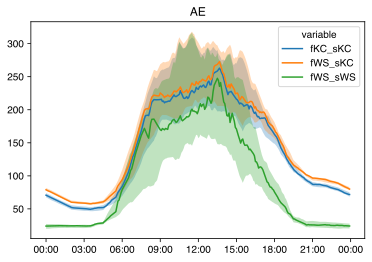

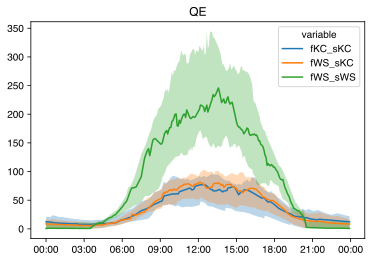

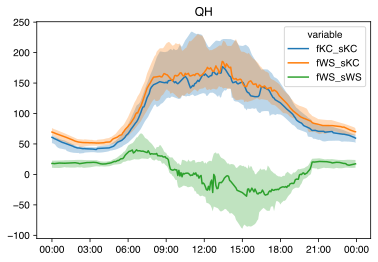

In [116]:

for var in ['AE','QE','QH']:
    fig,ax=sp.util.plot_day_clm(df_merge_x.loc['2012 7',var])
    _=ax.set_title(var)

In [44]:
df_sfr=df_state_merge_x.sfr.stack()
df_sfr.index=['Bldgs','Paved','DecTr','EveTr','Grass','BSoil','Water']
df_sfr

KC  KC_WS     WS
Bldgs  0.43   0.43  0.001
Paved  0.38   0.38  0.002
DecTr  0.00   0.00  0.010
EveTr  0.02   0.02  0.050
Grass  0.03   0.03  0.927
BSoil  0.00   0.00  0.010
Water  0.14   0.14  0.000

In [47]:
print(df_sfr.to_markdown())

|       |   KC |   KC_WS |    WS |
|:------|-----:|--------:|------:|
| Bldgs | 0.43 |    0.43 | 0.001 |
| Paved | 0.38 |    0.38 | 0.002 |
| DecTr | 0    |    0    | 0.01  |
| EveTr | 0.02 |    0.02 | 0.05  |
| Grass | 0.03 |    0.03 | 0.927 |
| BSoil | 0    |    0    | 0.01  |
| Water | 0.14 |    0.14 | 0     |


## T2 issue

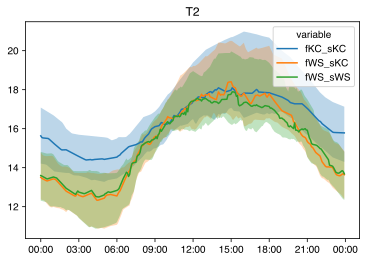

In [56]:
fig,ax=sp.util.plot_day_clm(df_merge_x.T2.loc['2012 7'])
_=ax.set_title('T2')

<AxesSubplot:title={'center':'T2'}, xlabel='datetime'>

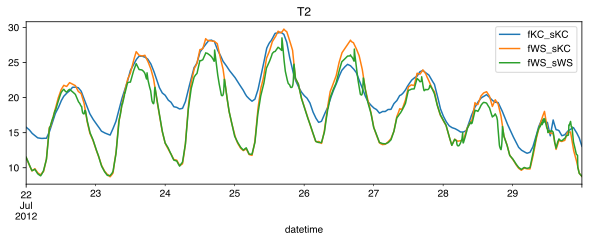

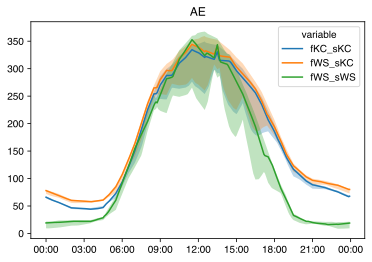

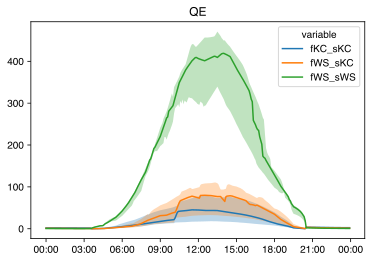

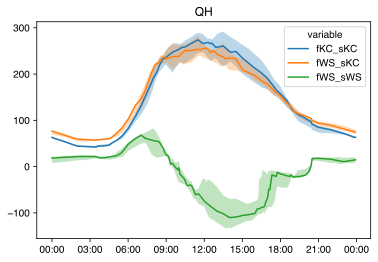

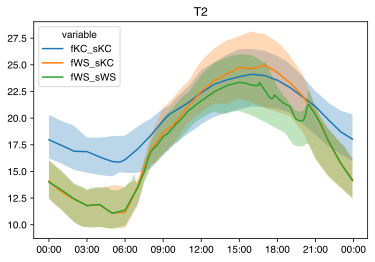

In [118]:
df_merge_x.loc[s:e,'T2'].plot(figsize=[10,3],title='T2')

for var in ['AE','QE','QH','T2']:
    fig,ax=sp.util.plot_day_clm(df_merge_x.loc[s:e,var])
    _=ax.set_title(var)

<AxesSubplot:xlabel='datetime'>

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

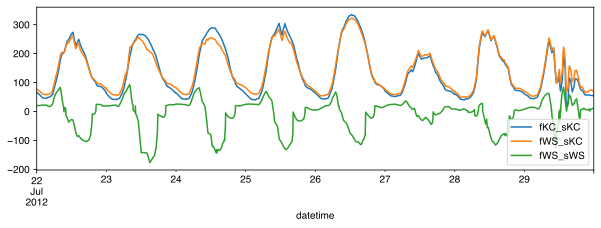

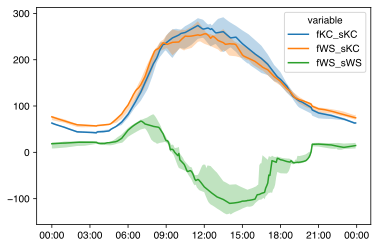

In [113]:
df_merge_x.loc[s:e,'QH'].plot(figsize=[10,3])
sp.util.plot_day_clm(df_merge_x.loc[s:e,'QH'])

<AxesSubplot:xlabel='datetime'>

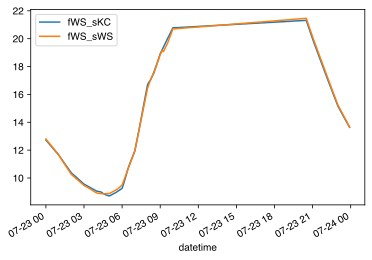

In [137]:
df_x=df_merge_x.loc[s:e,['QH','T2']].stack(0).iloc[:,1:].unstack(1).swaplevel(axis=1).sort_index(axis=1)
idx=df_x.loc['2012 7 23','QH'].query('fWS_sWS>0').index
df_x.loc['2012 7 23','T2'].loc[idx].plot()

<AxesSubplot:title={'center':'dif_T2'}, xlabel='flag_QH'>

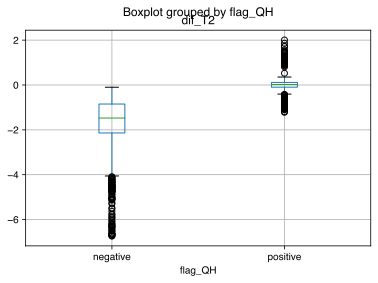

In [161]:
df_x=df_merge_x.loc[s:e,'QH']
flag_QH=df_x.fWS_sWS.where(df_x.fWS_sWS>0,False).astype(bool)
df_x=df_merge_x.loc[s:e,'T2'].diff(axis=1).assign(flag_QH=flag_QH.replace({True:'positive',False:'negative'}))
df_x.melt(id_vars='flag_QH',value_vars=['fWS_sWS'],value_name=r'dif_T2').boxplot(column=r'dif_T2',by='flag_QH')

<AxesSubplot:>

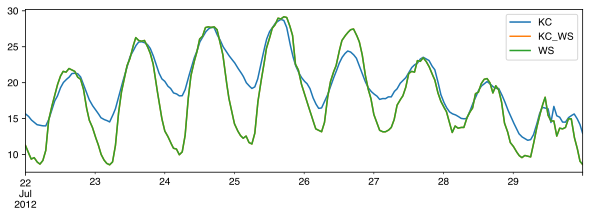

In [63]:
df_forcing_merge_x.loc[s:e,'Tair'].plot(figsize=[10,3])

In [109]:
df_T_RSL=df_output_merge_x.RSL.filter(like='T_').loc[s:e].stack().drop_prefix('T_').sort_index(axis=1,key=pd.to_numeric).unstack()


<AxesSubplot:xlabel='datetime'>

<AxesSubplot:xlabel='datetime'>

<AxesSubplot:xlabel='datetime'>

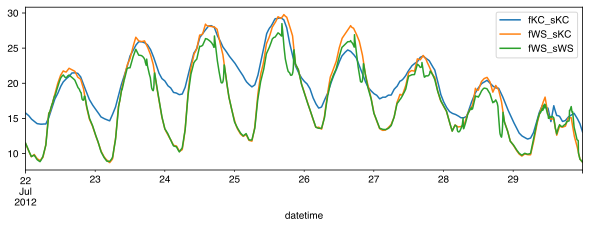

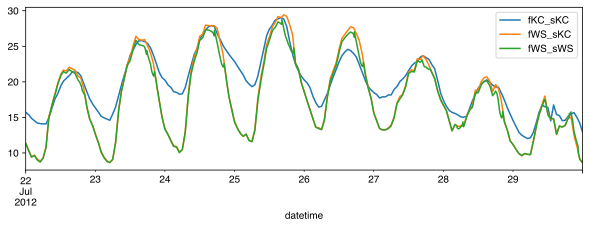

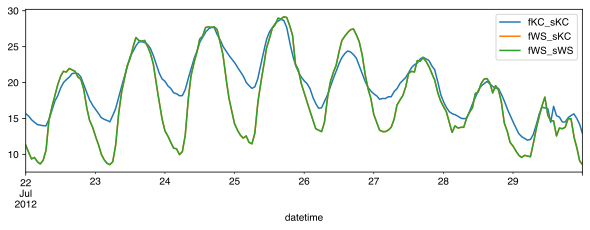

In [111]:
df_T_RSL.loc[:,'1'].plot(figsize=[10,3])
df_T_RSL.loc[:,'15'].plot(figsize=[10,3])
df_T_RSL.loc[:,'30'].plot(figsize=[10,3])

In [124]:
df_output_merge_x.RSL.stack().columns.to_list();

In [123]:
df_output_merge_x.RSL.flag_RSL

fKC_sKC  fWS_sKC  fWS_sWS
datetime                                      
2011-01-01 00:05:00      1.0      1.0      0.0
2011-01-01 00:10:00      1.0      1.0      0.0
2011-01-01 00:15:00      1.0      1.0      0.0
2011-01-01 00:20:00      1.0      1.0      0.0
2011-01-01 00:25:00      1.0      1.0      0.0
...                      ...      ...      ...
2012-12-31 23:40:00      1.0      1.0      0.0
2012-12-31 23:45:00      1.0      1.0      0.0
2012-12-31 23:50:00      1.0      1.0      0.0
2012-12-31 23:55:00      1.0      1.0      0.0
2013-01-01 00:00:00      1.0      1.0      0.0

[210528 rows x 3 columns]